# Übung 8: Clustering

### Übung von adrian.willi@stud.hslu.ch

##  Aufgabe 1: K-Means

Clustering ist eine Methode um mittles Unsupervised Learning zusammen gehörende Daten zu finden und kann für verschiedene Daten angewendet werden.

In dieser Übung möchten wir versuchen, damit ähnlichfarbige Objekte/Regionen in Bildern zu erkennen.

In [45]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 200

### Hintergrund / Vordergrund Detektion
Als erstes möchten wir nochmals unsere Hintergrund Segmentierung der Hände anschauen. Können wir diese mit Clustering lösen?

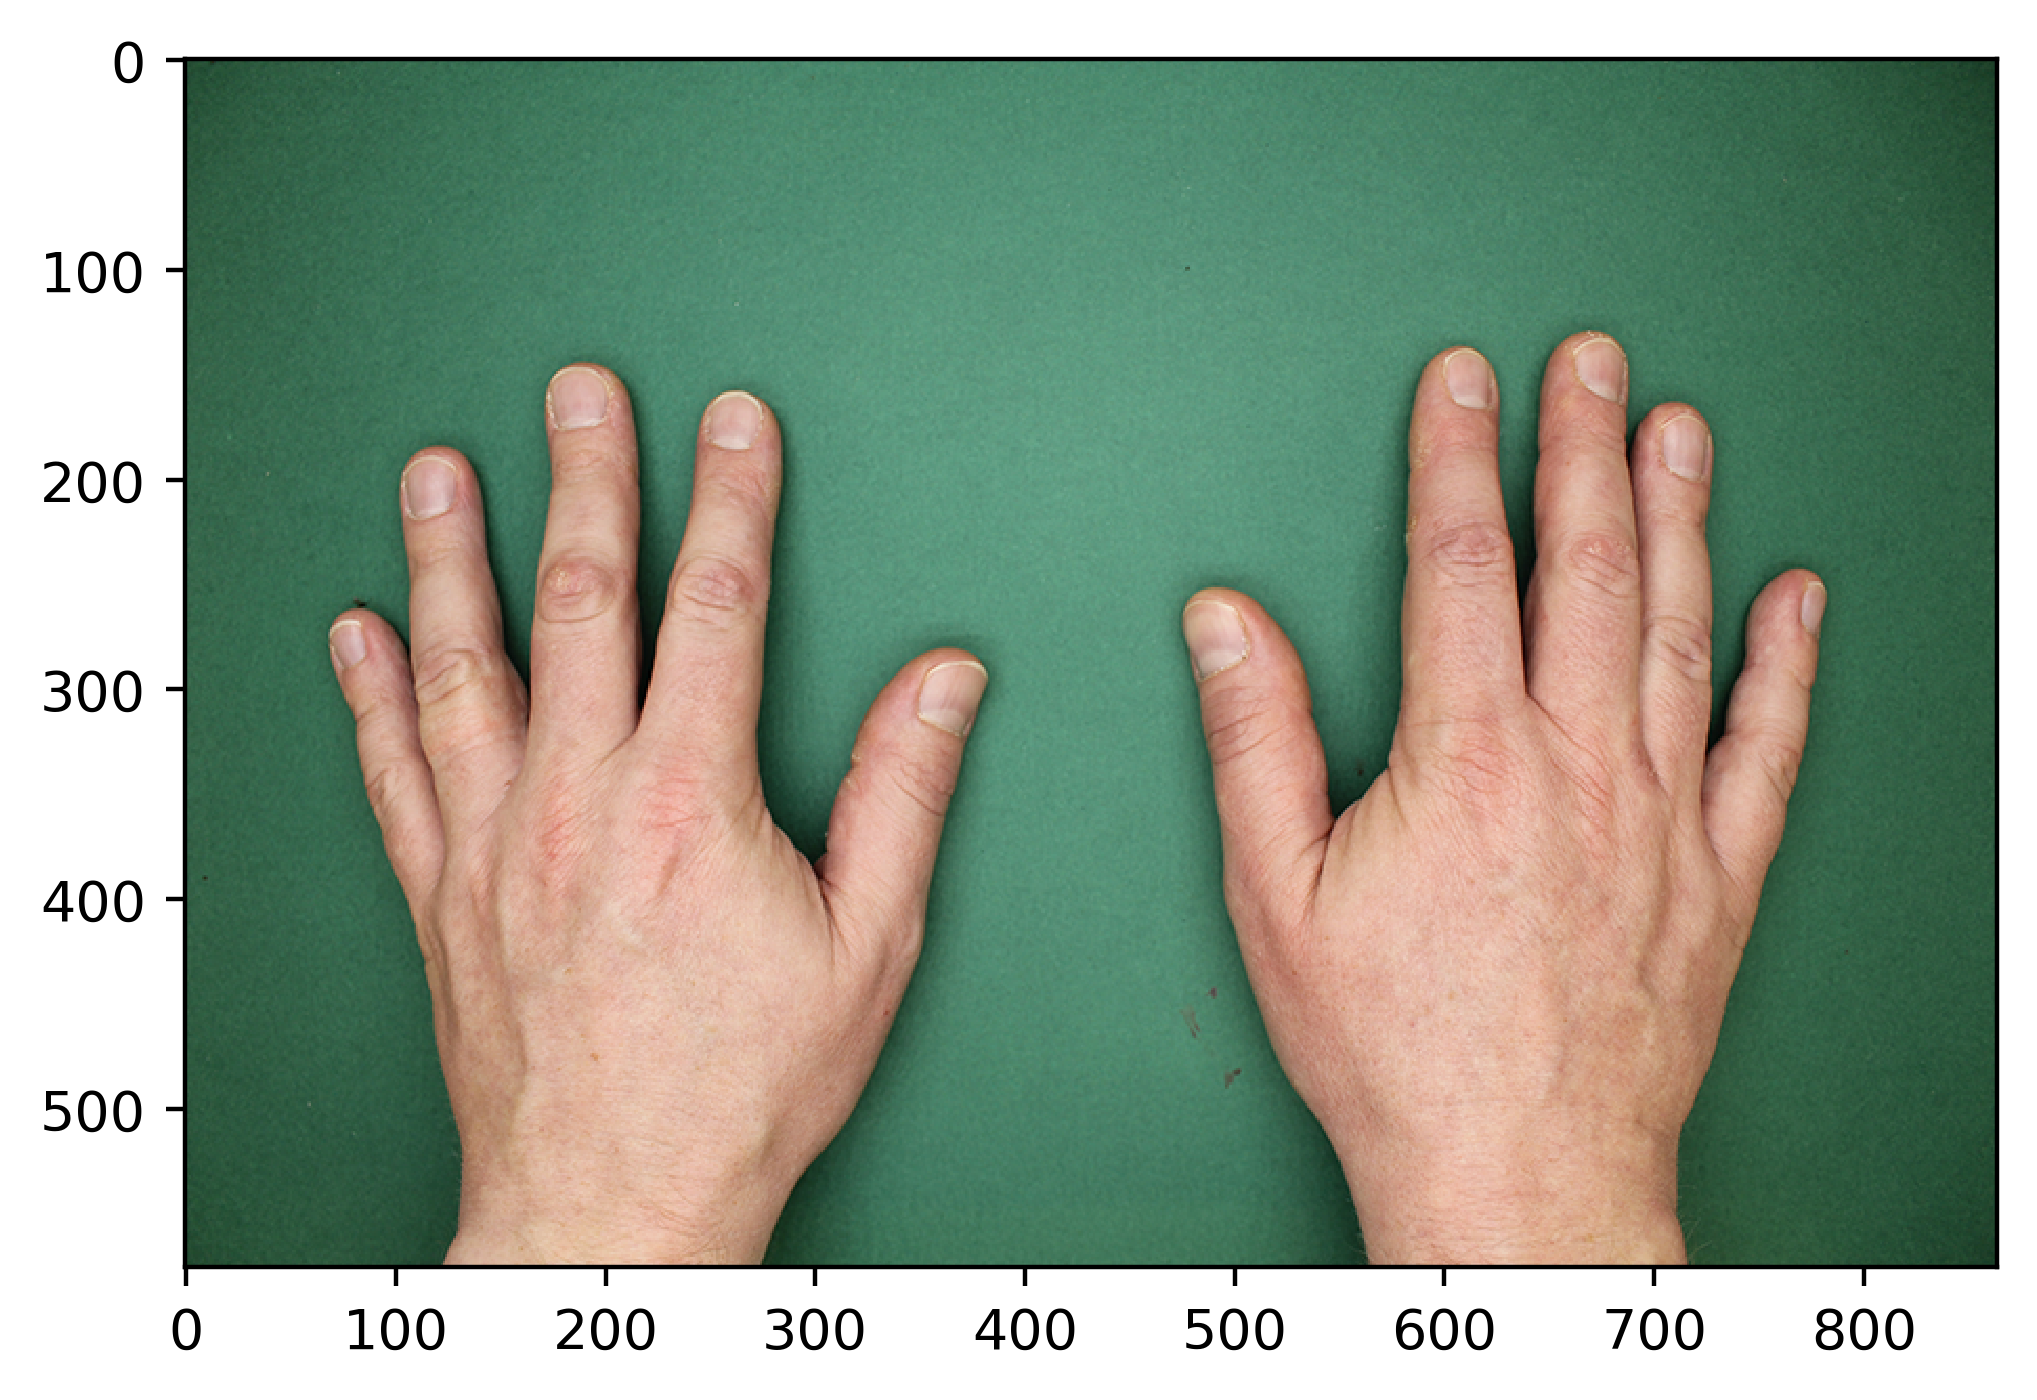

In [162]:
image  = cv2.imread('images/hand_green_small.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

OpenCV enthält eine Implementation von k-Means. Als Input wird dabei ein (1D-) Array von Farbwerten verwendet, sie müssen das Bild also von einem 2D Array von RGB in ein 1D Array von RGB umwandeln. Dazu kann reshape (numpy) verwendet werden.

Wenden Sie nun die Funktion `cv2.kmeans(...)` an. Als TermCriteria können sie die folgende Struktur benutzen, diese gibt an dass die kmeans Suche nach 100 Iterationen beendet werden soll, oder wenn sich die Cluster Zentren nicht mehr als 0.001 ändern. 

`criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001))`

Wenn Sie im Algorithmus keine Cluster Zentren initialisieren wollen, können sie als Labels `None` übergeben.

[[32. 70. 46.]
 [33. 72. 48.]
 [34. 75. 48.]
 ...
 [27. 63. 39.]
 [28. 62. 39.]
 [25. 60. 38.]]


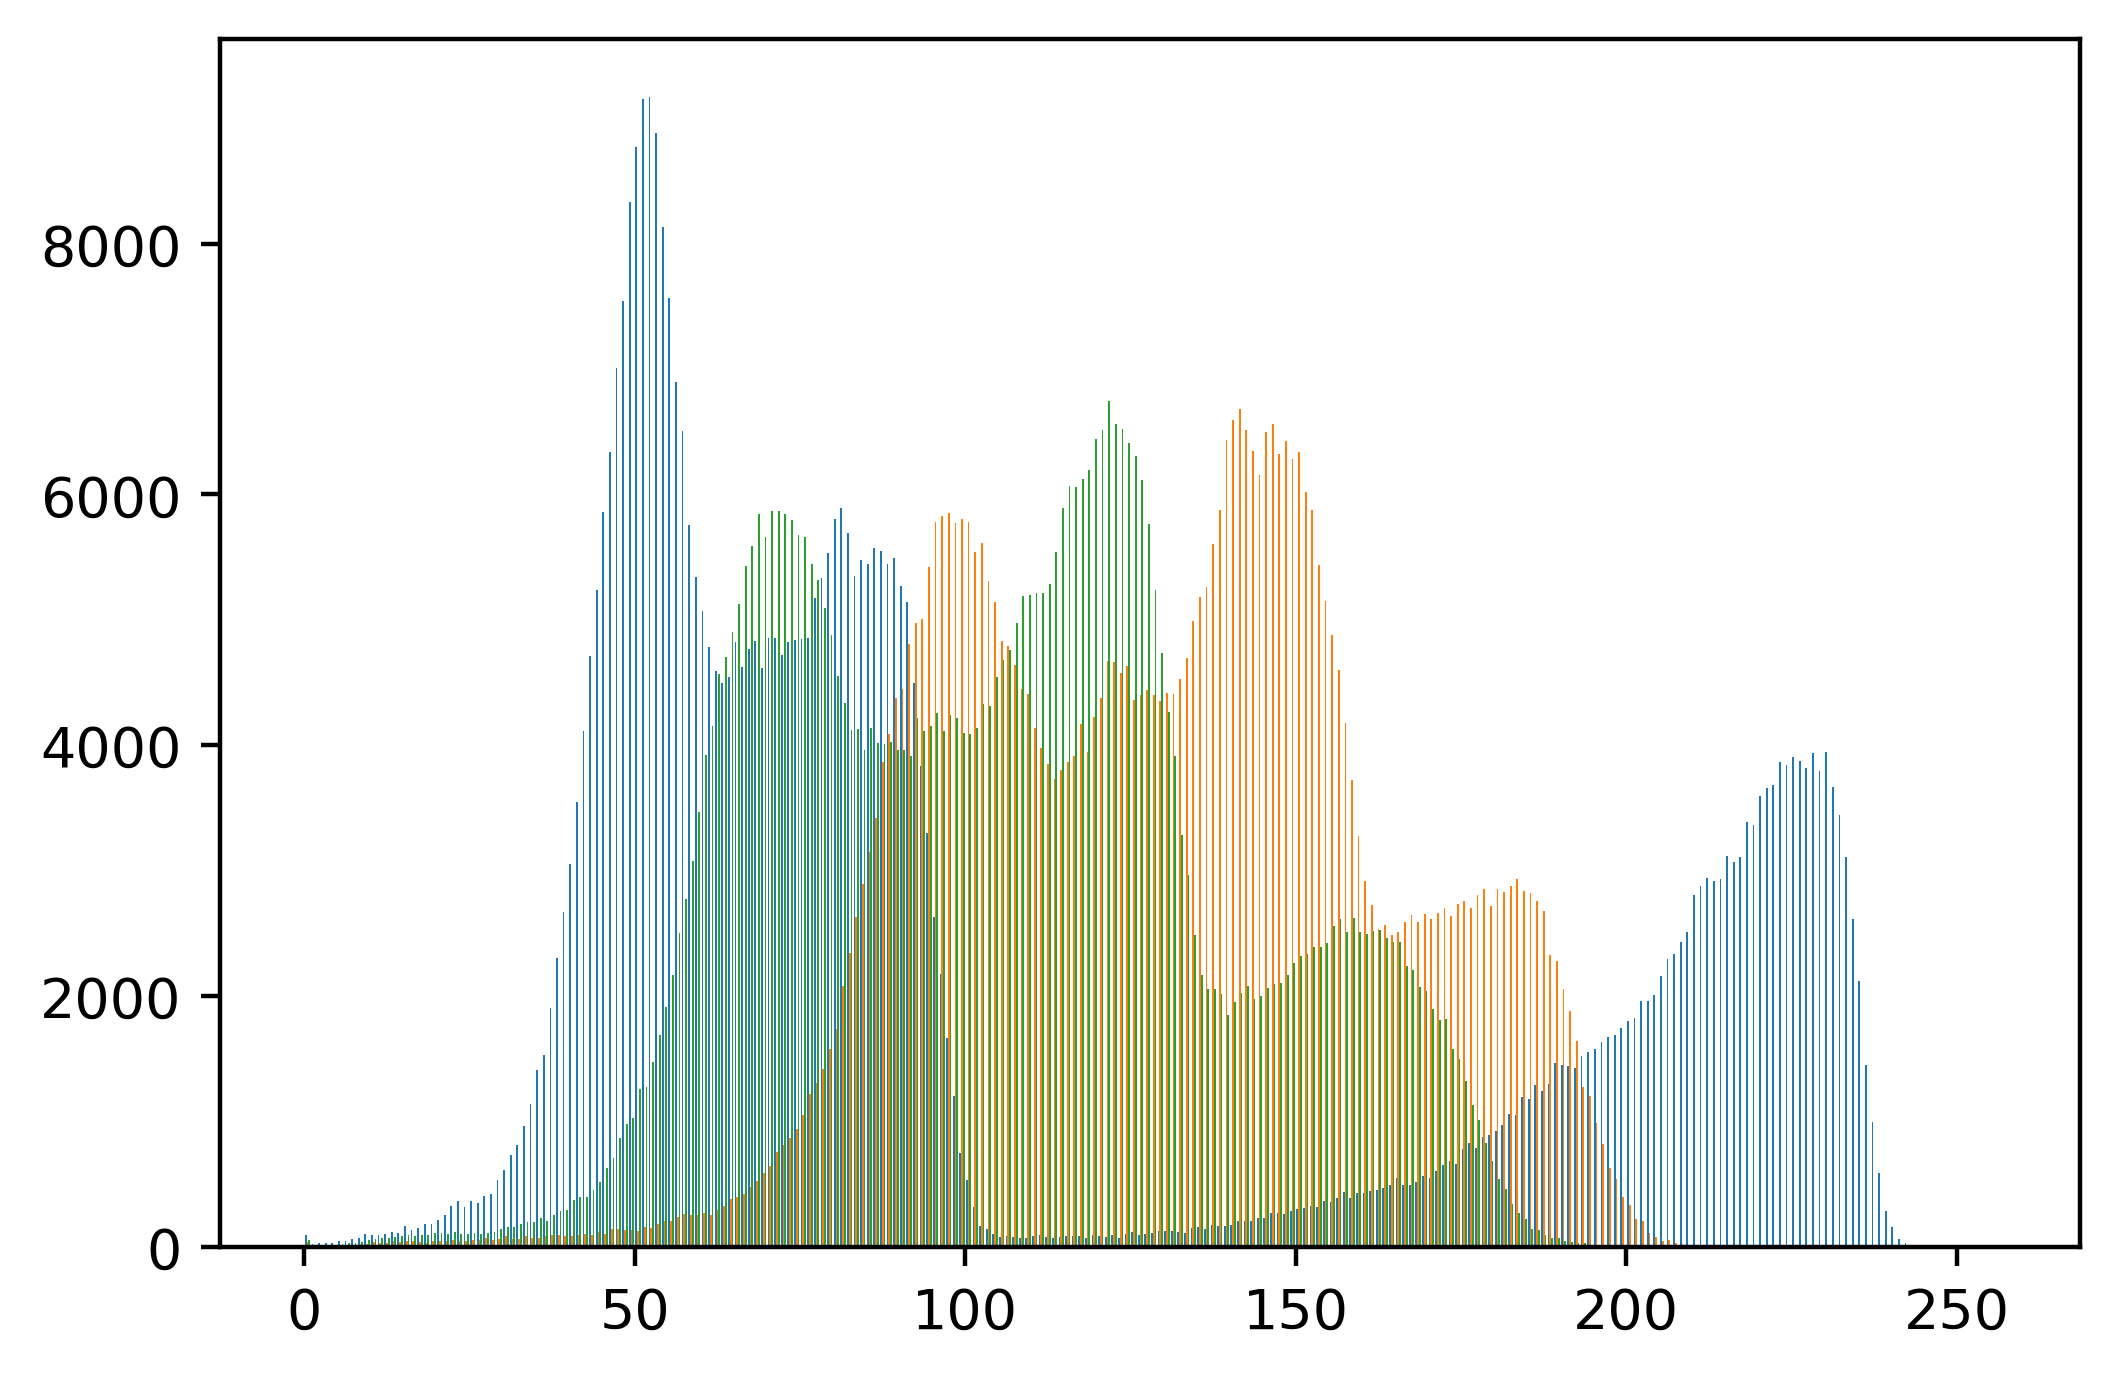

In [165]:
#Convert to 1D(column vector) and type float32 
data = np.reshape(image,(-1,3))
data = np.float32(data)                  
print(data)

#plot hist
plt.hist(data,256,[0,256]),plt.show()

# Define criteria 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

#nclusters(K) : Number of clusters required at end
K = 2

# Apply KMeans
compactness, label, center = cv2.kmeans(data, K, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)

Stellen Sie das Resultat wieder als Bild dar. Dazu können Sie zum Beispiel die Cluster Centers verwenden und das Label Bild wieder auf das 2 dimensionale Bildraster umformen.

Alternativ können Sie zur Überlagerung von Bildern und Label auch die Funktion ```skimage.color.label2rgb``` verwenden.

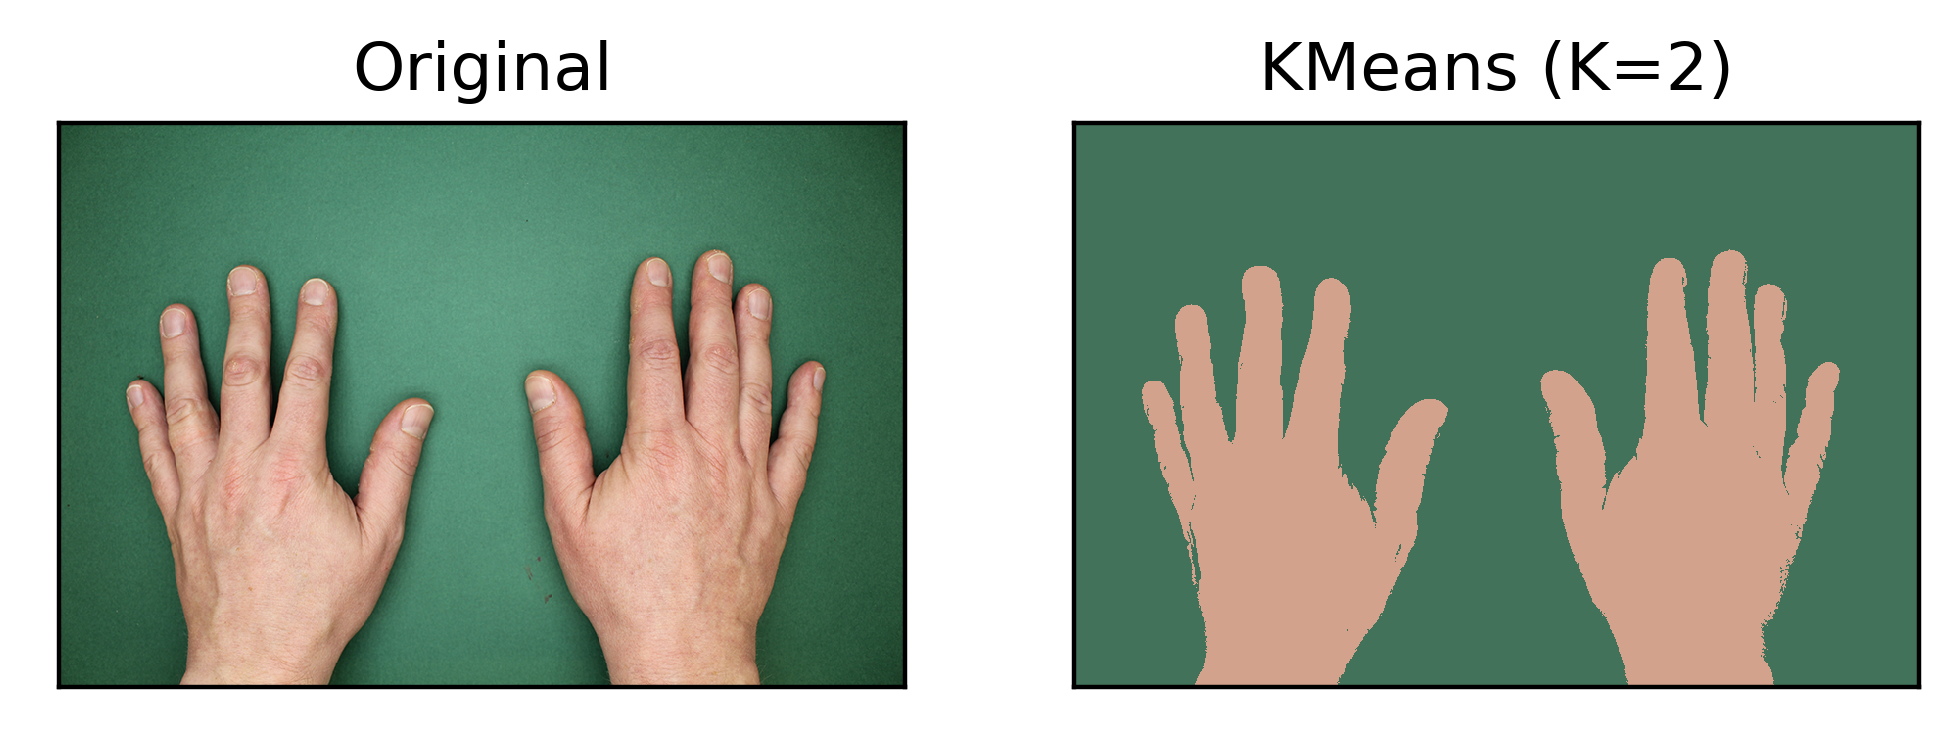

In [166]:
# Convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image.shape))

plt.subplot(1, 2, 1)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('KMeans (K={})'.format(K)), plt.xticks([]), plt.yticks([])
plt.imshow(res2)

plt.show()

### Mehrere Labels / Figuren

Auf dem nächsten Bild sollen nun die verschiedenen Figuren anhand ihrer Farbe detektiert werden. Dazu sind mehrere Cluster notwendig. 

Welche Anzahl Cluster funktioniert am besten?
Wie kann man die Güte der Ergebnisse beurteilen? 

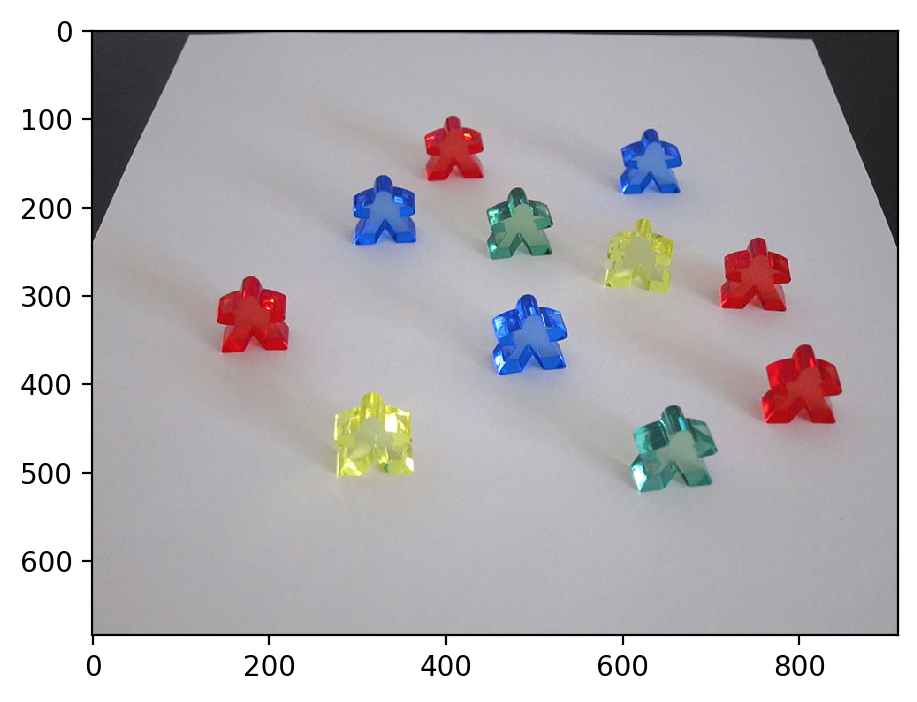

In [6]:
image_multicolor  = cv2.imread('images/figures.jpg')
image_multicolor = cv2.cvtColor(image_multicolor, cv2.COLOR_BGR2RGB)
plt.imshow(image_multicolor)
plt.show()

[[ 51.  52.  57.]
 [ 51.  52.  56.]
 [ 52.  53.  57.]
 ...
 [162. 160. 161.]
 [163. 161. 162.]
 [164. 162. 163.]]
[[ 44  46  49]
 [ 44  46  49]
 [ 44  46  49]
 ...
 [172 169 173]
 [172 169 173]
 [172 169 173]]


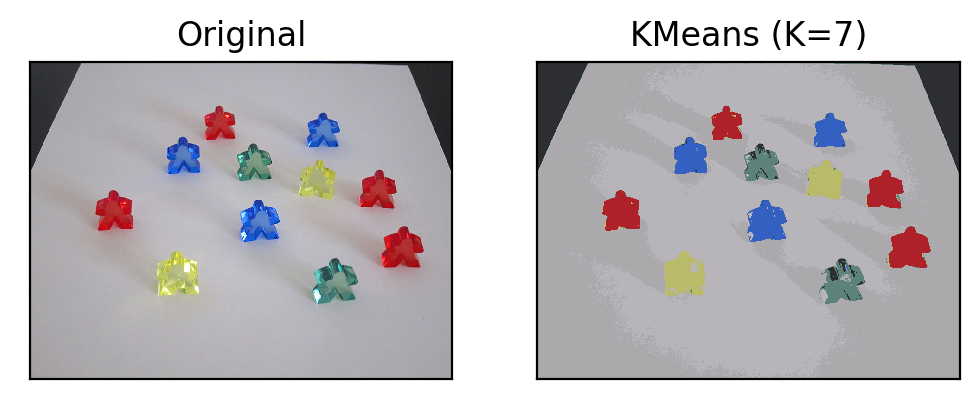

In [7]:
#Convert to 1D(column vector) and type float32 
data_multicolor = np.reshape(image_multicolor,(-1,3))
data_multicolor = np.float32(data_multicolor)                  
print(data_multicolor)

# Define criteria 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

#nclusters(K) : Number of clusters required at end
K = 7

# Apply KMeans
compactness, label, center = cv2.kmeans(data_multicolor, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
print(res)
res2 = res.reshape((image_multicolor.shape))

plt.subplot(1, 2, 1)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.imshow(image_multicolor)

plt.subplot(1, 2, 2)
plt.title('KMeans (K={})'.format(K)), plt.xticks([]), plt.yticks([])
plt.imshow(res2)

plt.show()

Ein Problem ist, das ähnliche Farben von verschiedener Intensität in verschidenen Clustern enden. Also es entseht zum Beispiel ein Cluster mit Hellblau und einer mit Dunkelblau. Wie könnte das verhindert werden?

Implementieren Sie ein Clustering, sodass für jede Farbe nur ein Cluster erzeugt wird.


In [ ]:
#siehe oben

## Aufgabe 2: Clustering in Positions- und Farbraum

Bei obiger Aufgabe wurde nur nach Farbe geclustered, also gehören zum Beispiel die grünen Figuren zusammen. Wir können auch versuchen nach Positionen und Farben zu Clustern. Der Input zu k-Means wäre dann nicht mehr ein nx3 sondern ein nx5 Array. 

Implementieren Sie dieses und interpretieren Sie das Resultat. Entspricht das den Erwartungen?

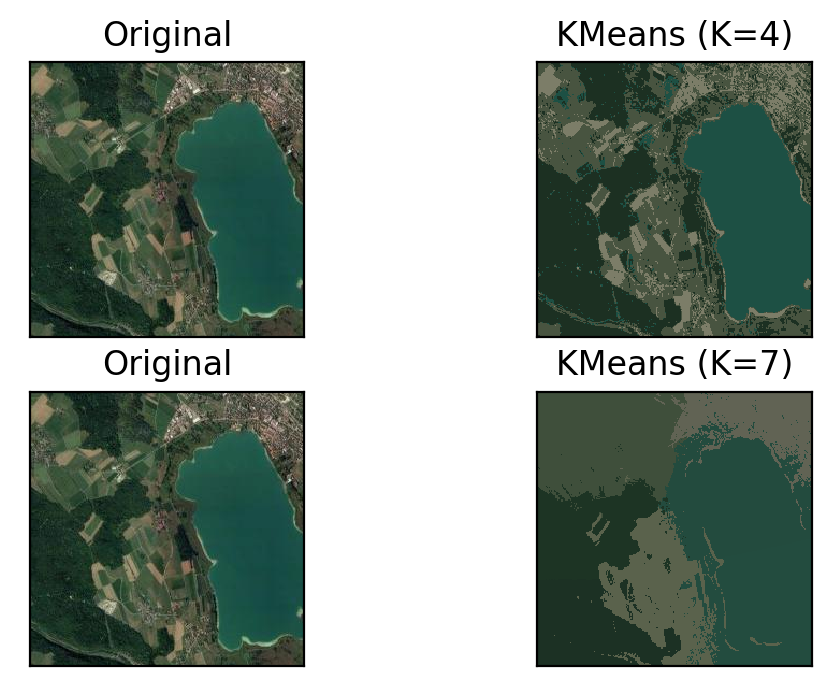

In [56]:
small  = cv2.imread('images/small1.jpg')
small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)

#Convert to 1D(column vector) and type float32 
data_small = np.reshape(small,(-1,3))
data_small = np.float32(data_small)                  

# Define criteria 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

#nclusters(K) : Number of clusters required at end
K = 4

# Apply KMeans
compactness, label, center = cv2.kmeans(data_small, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((small.shape))

plt.subplot(2, 2, 1)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.imshow(small)

plt.subplot(2, 2, 2)
plt.title('KMeans (K={})'.format(K)), plt.xticks([]), plt.yticks([])
plt.imshow(res2)


''''
###################################################################################################################
AUFGABE 2
###################################################################################################################
'''

image = cv2.imread('images/small1.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height = image.shape[0]
width = image.shape[1]
cv2.resize(img, (height, width))

data = np.array([])
img_height = img.shape[0]
img_width = img.shape[1]
for width in range(img_width):
    for height in range(img_height):
        r, g, b = img[width, height, 0], img[width, height, 1], img[width, height, 2]
        temp = np.array([r, g, b, height, width])
        data = np.append(data, temp)
        
data_5D = np.reshape(data,(-1,5))        

data_5D = np.float32(data_5D)                  

# Define criteria 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.001)

#nclusters(K) : Number of clusters required at end
K = 7

# Apply KMeans
compactness, label, center = cv2.kmeans(data_5D, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back and make original image
center = np.uint8(center)
res = center[label.flatten()]
res = res[:][:,:-2]
res2 = res.reshape(img.shape)

plt.subplot(2, 2, 3)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(2, 2, 4)
plt.title('KMeans (K={})'.format(K)), plt.xticks([]), plt.yticks([])
plt.imshow(res2)

plt.show()

## Aufgabe 3: Mean Shift

OpenCV enthält auch eine Funktion um Mean Shift durchzuführen: `pyrMeanShiftFiltering`. Allerdings kann diese nur direkt auf Bildern angewendet werden und nicht auf allgemeine Daten. 

Wenden Sie die Funktion auf das ursprüngliche Bild an und interpretieren Sie das Resultat.

### pyrMeanShiftFiltering(src, sp, sr[, dst[, maxLevel[, termcrit]]]) -> dst
*  src The source 8-bit, 3-channel image.
*  dst The destination image of the same format and the same size as the source.
*  sp The spatial window radius.
*  sr The color window radius.
*  maxLevel Maximum level of the pyramid for the segmentation.
*  termcrit Termination criteria: when to stop meanshift iterations.

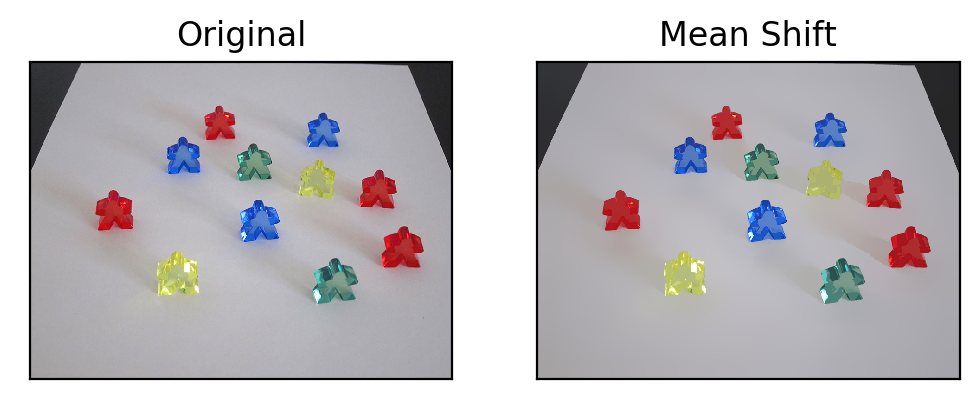

In [57]:
image = cv2.imread('images/figures.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = cv2.pyrMeanShiftFiltering(image, 30, 20)

plt.subplot(121)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.imshow(image)

plt.subplot(122)
plt.title('Mean Shift'), plt.xticks([]), plt.yticks([])
plt.imshow(result)

plt.show()
